Import the necessary libraries

In [8]:
from UQpy.SampleMethods import MCMC
from UQpy.UQpyModules import RunModel
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import time

Define the Rosenbrock probability density function up to a scale factor

In [9]:
def Rosenbrock(x,params):
     return np.exp(-(100*(x[1]-x[0]**2)**2+(1-x[0])**2)/params[0])

Run MCMC using the defined Rosenbrock distribution for 100 samples using the component-wise modified Metropolis-Hastings Algorithm and jumping with of 100 samples. 

In [10]:
x = MCMC(dimension=2, pdf_proposal_type='Normal', pdf_proposal_scale=[1.,1.], pdf_target_type='joint_pdf',
         pdf_target=Rosenbrock, pdf_target_params = [20], algorithm='MMH', jump=100, nsamples=100, seed=None)

Use x.samples as the seed points for to draw 1000 samples from the Rosenbrock distribution using the affine invariant ensemble MCMC with stretch moves. Note that we need 100 distinct seed points as our ensemble is of size 100.

In [11]:
t = time.time()
z = MCMC(dimension=2, pdf_proposal_type=None, pdf_proposal_scale=2, pdf_target_type='joint_pdf',
         pdf_target='Rosenbrock', pdf_target_params=[20], algorithm='Stretch', jump=1000, nsamples=1000, seed=x.samples)
t_stretch = time.time()-t
print(t_stretch)

12.90026593208313


Generate 1000 samples from the Rosenbrock distribution using the component-wise modified Metropolis-Hastings algorithm and jumping width of 1000 samples for comparison with the stretch MCMC

In [14]:
t2 = time.time()
y = MCMC(dimension=2, pdf_proposal_type='Normal', pdf_proposal_scale=1, pdf_target_type='joint_pdf',
         pdf_target='Rosenbrock', pdf_target_params=[20], algorithm='MMH', jump=1000, nsamples=1000, seed=None)
t_MMH = time.time()-t2
print(t_MMH)

21.58146905899048


Generate 1000 samples from the Rosenbrock distribution using the conventional Metropolis-Hastings algorithm and jumping width of 1000 samples for comparison with the stretch MCMC

In [16]:
t3 = time.time()
w = MCMC(dimension=2, pdf_proposal_type='Normal', pdf_proposal_scale=1, pdf_target_type='joint_pdf',
         pdf_target='Rosenbrock', pdf_target_params=[20], algorithm='MH', jump=1000, nsamples=1000, seed=None)
t_MH = time.time()-t3
print(t_MH)

132.49183797836304


Plot the sample sets from 'stretch', 'MMH', and 'MH' for comparison

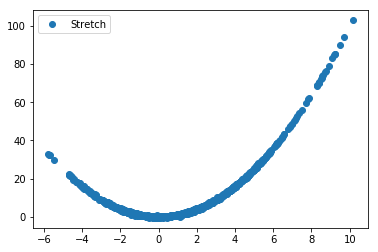

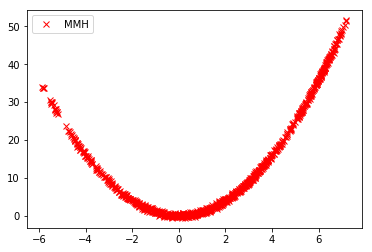

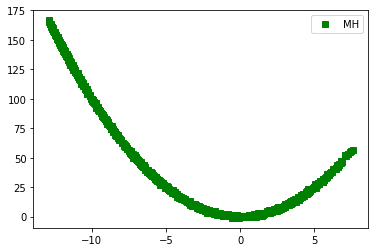

In [22]:
plt.plot(z.samples[:,0],z.samples[:,1],'o')
plt.legend(['Stretch'])
plt.show()
plt.plot(y.samples[:,0],y.samples[:,1],'rx')
plt.legend(['MMH'])
plt.show()
plt.plot(w.samples[:,0],w.samples[:,1],'gs')
plt.legend(['MH'])
plt.show()